# Ejercicios resueltos de clase 2

In [327]:
import numpy as np
import matplotlib.pyplot as plt

#### Ejercicio 1

Obtener para cada fila en X, el índice de la fila en C con distancia euclídea más pequeña.
Es decir, decir para cada fila en X a qué cluster pertenece en C.

In [328]:
# Ejercicio 1
def get_distances(X, C):
    """Obtiene para cada vector de X la distancia a cada vector de C.
    X -- Array. Cada fila es un vector
    C -- Array. Cada fila es un vector
    """
   
    """
    Ignorando el cuadrado y raíz por el momento, quiero calcular distances = X - C, tal que:

        ~~~
        D = [
            X[0] - C[0],
            X[0] - C[1],
            X[1] - C[0],
            X[1] - C[1],
            X[2] - C[0],
            X[2] - C[1]
        ]
        ~~~

        siendo:

        ~~~
            X[0] - C[0] = [1,2,3] - [1,0,0] = [0,-2,3],
            X[0] - C[1] = [1,2,3] - [1,0,0] = [0,2,3],
            ...
        ~~~
        
    Según https://scipy.github.io/old-wiki/pages/EricsBroadcastingDoc:
    
    > In order to broadcast, the size of the trailing axes for both arrays 
    > in an operation must either be the same size or one of them must be one.

    Si intento restar directamente (3,3) - (2,3) Falla la regla de broadcast porque 3!=2
    y ninguno de los dos es 1.
    Pero si en cambio pruebo con (3,3)-(2,1,3) la regla de broadcasting permite calcular
    (1,3)-(1,3) sobre el eje 0 (filas):
        Operation Axis (0) Size       Trailing Axis Size
        3                            (3) automatically reshaped to (1,3)
        2                            (1,3)
        
    Nota: interpreto que es el (1,3) de dimensión 2 el que lleva a expandir el (3) a (1,3).
    """
    expanded_C = C[:, None]
    return np.sqrt(np.sum((expanded_C - X) ** 2, axis=-1))

In [329]:
# Ejercicio 1 - Test

X = np.array([
    [1,2,3],
    [4,5,6],
    [7,8,9]
])
C = np.array([
    [1,0,0],
    [0,1,1]
])
distances = get_distances(X,C)

#### Ejercicio 2

Obtener para cada fila en X, el índice de la fila en C con distancia euclídea más pequeña.
Es decir, decir para cada fila en X a qué cluster pertenece en C.
Por ejemplo, si el resultado anterior fue:

~~~python
[[ 3.60555128 8.36660027 13.45362405]
[ 2.44948974 7.54983444 12.72792206]]
~~~

El programa debería devolver [1, 1, 1]
Hint: utilizar np.argmin

In [330]:
# Ejercicio 2 - Test
def get_nearest(distances):
    return np.argmin(distances,axis=0)

In [331]:
nearest = get_nearest(distances)

#### Ejercicio 3

K-means es uno de los algoritmos más básicos en Machine Learning no supervisado.
Es un algoritmo de clusterización, que agrupa los datos que comparten características similares.
Recordemos que entendemos datos como n realizaciones del vector aleatorio X.
El algoritmo K-means funcione de la siguiente manera:
1. El usuario selecciona la cantidad de clusters a crear (n).
2. Se seleccionan n elementos aleatorios de X como posiciones iniciales del los centroides C.
3. Se calcula la distancia entre todos los puntos en X y todos los puntos en C.
4. Para cada punto en X se selecciona el centroide más cercano de C.
5. Se recalculan los centroides C a partir de usar las filas de X que pertenecen a cada centroide.
6. Se itera entre 3 y 5 una cantidad fija de veces o hasta que la posición de los centroides no cambie.

Implementar la función def k_means(X, n) de manera tal que al finalizar devuelva la posición de los
centroides y a que cluster pertenece cada fila de X.
Hint: para (2) utilizar funciones de np.random, para (3) y (4) usar los ejercicios anteriores,
para (5) es válido utilizar un for. Iterar 10 veces entre (3) y (5).

In [332]:
# Ejercicio 3

MAX_ITERATIONS = 10

def k_means(X, n_clusters,max_iterations=MAX_ITERATIONS):
    centroids = np.eye(n_clusters, X.shape[1])
    #print(centroids)
    for i in range(max_iterations):
        #print("Iteration # {}".format(i))
        centroids, cluster_ids = k_means_loop(X, centroids)
        #print(centroids)
    return centroids, cluster_ids

def k_means_loop(X, centroids):
    # find labels for rows in X based in centroids values
    expanded_centroids = centroids[:, None]
    distances = np.sqrt(np.sum((expanded_centroids - X) ** 2, axis=2))
    arg_min = np.argmin(distances, axis=0)
    # recompute centroids
    for i in range(centroids.shape[0]):
        centroids[i] = np.mean(X[arg_min == i, :], axis=0)
    return centroids, arg_min

In [333]:
# Ejercicio 3 - Test
data, cluster_ids = build_cluster(100, 0.1)
k_means(data,4)

(array([[ 1.19819746, -0.13760135, -0.42571892, -0.58473787],
        [-0.15522857,  1.20505991, -0.30053494, -0.54552031],
        [-0.53634651, -0.19557011,  1.30200757, -0.29674342],
        [-0.28050539, -0.45120452, -0.20341983,  1.16346523]]),
 array([2, 0, 0, 2, 3, 2, 1, 1, 0, 2, 3, 0, 3, 1, 0, 1, 2, 3, 2, 2, 1, 2,
        2, 1, 0, 0, 0, 2, 0, 1, 3, 2, 3, 3, 1, 3, 1, 0, 2, 3, 2, 2, 1, 2,
        1, 0, 1, 3, 3, 2, 1, 2, 3, 0, 1, 3, 3, 1, 1, 3, 1, 0, 1, 0, 0, 1,
        0, 2, 3, 0, 2, 0, 0, 3, 2, 1, 2, 2, 0, 3, 3, 2, 1, 2, 2, 1, 3, 0,
        3, 3, 2, 0, 2, 1, 3, 1, 3, 2, 1, 0]))

#### Ejercicio 4

Utilizar numpy para crear datos clusterizados A/B en 4 dimensiones.

Hint:
- Definir una matriz con centroides [1,0,0,0] y [0,1,0,0]
- Utilizar una constante para separar o alejar los centroides entre si.
- Utilizar np.repeat para crear n/2 muestras de cada centroide.
- Sumar a cada centroide un vector aleatorio normal i.i.d. con media 0 y desvio (np.random.normal).
- Armar un arreglo que tenga n enteros indicado si la muestra pertenece a A o a B.

In [334]:
# Ejercicio 4

def build_cluster(n_samples, inv_overlap):
    """
    Genera muestras pertenecientes a dos clusters.
    n_samples -- Cantidad de muestras.
    inv_overlap -- Distancia de separación.    
    """
    centroids = np.array([
        [1,0,0,0],
        [0,1,0,0],
    ], dtype=np.float32)
    centroids = centroids * inv_overlap
    data = np.repeat(centroids, n_samples / 2, axis=0)
    normal_noise = np.random.normal(loc=0, scale=1, size=(n_samples, 4))
    data = data + normal_noise
    cluster_ids = np.array([[0],[1],])
    cluster_ids = np.repeat(cluster_ids, n_samples / 2, axis=0)
    return data, cluster_ids

In [335]:
# Ejercicio 4 - Test
import matplotlib.pyplot as plt

data, cluster_ids = build_cluster(10, 1)
data

array([[ 1.62308543, -1.68824715,  0.81403391,  0.30171272],
       [ 3.09066407, -1.07279074,  0.81892817,  1.35063547],
       [ 0.5081357 , -0.85738918, -0.31567735,  0.74435572],
       [ 0.58544819,  0.99448112, -0.14850023,  0.61722938],
       [ 0.0307204 , -0.93963297, -0.87267591,  0.74731429],
       [ 1.77846486, -0.77867144, -0.25735863,  0.51235265],
       [-0.51848566,  0.63949968,  0.51165927,  1.25882047],
       [-0.20745672,  0.18819073, -0.97642459,  0.19596659],
       [ 0.82171211,  2.9149364 ,  0.32300191, -0.81513456],
       [ 0.68743125,  2.37736982, -0.68516705, -0.29264682]])

#### Ejercicio 5

Utilizar numpy para simular una exponencial de parámetro lambda.

Hint:
- Hacer una función que genere n muestras de la variable aleatoria X
- Utilizar el resultado obtenido en la diapositiva anterior
- Utilizar np.random.uniform

In [336]:
# Ejercicio 5
def exponential_random_variable(lambda_param, size):
    u = np.random.uniform(low=0.0, high=1.0, size=size)
    return (-1 / lambda_param) * np.log(1 - u)

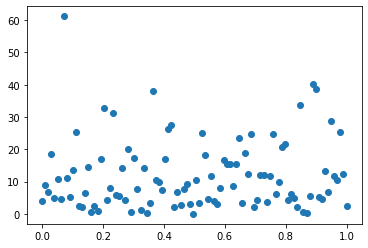

In [337]:
# Ejercicio 5 - Test

data = exponential_random_variable(0.1,100)
x = np.linspace(0,1,data.shape[0])
plt.scatter(x,data)

#### Ejercicio 6

Calcular la inversa generalizada y simular.
Sabiendo que la variable aleatoria es continua, la función de densidad de probabilidad se define según:
$$
F_X(x) = P(X \le x) = \int_{-\infty}^{x}f(t)dt
$$

Para una variable aleatoria con función de densidad de probabilidad:

$$
f_X(x) = 3x^2\{0 < x < 1\}
$$

Obtener la inversa generalizada y utilizar numpy para simular n muestras.

In [338]:
# Ejercicio 6 
# TODO

In [339]:
# Ejercicio 6 - Test
# TODO

#### Ejercicio 7

Dado un dataset X de n muestras y m columnas, implementar un método en numpy para normalizar con
z-score. 

$$
z = \frac{x - \mu}{\sigma}
$$

Pueden utilizar np.mean() y np.std()

In [340]:
# Ejercicio 7
def zscore_norm(dataset):
    """ Normaliza un dataset c/ z-score
    -- dataset: mxn, m=muestras,n=features
    """
    feat_mean = np.mean(data,axis=0)   
    feat_std = np.std(data,axis=0)
    return (data-feat_mean)/feat_std

In [341]:
# Ejercicio 7 - Test
data, _ = build_cluster(10, 1)
zscore_norm(data)

array([[ 0.46316708, -0.71803103,  0.94394167, -1.43617745],
       [ 1.69970919,  1.16303076,  0.39085843,  0.57723698],
       [ 0.97845176, -1.21594742,  1.43547386, -0.16361972],
       [ 0.85525387,  0.66969527, -1.39321191,  1.73830282],
       [-0.69823896, -0.4212617 , -0.06382516, -1.17213775],
       [-0.52202576, -1.89943673,  0.495294  ,  1.208384  ],
       [-0.24990879,  1.07871132, -2.03155134, -0.5564533 ],
       [-2.06481009,  1.0996945 , -0.11847228,  0.88458224],
       [-0.31785593,  0.2135508 ,  0.67356055, -0.69199908],
       [-0.14374236,  0.02999423, -0.33206782, -0.38811875]])

#### Ejercicio 8

Siguiendo los pasos del slide anterior, se requiere utilizar numpy para calcular PCA del dataset de entrada X
utilizando las 2 componentes más importantes.

~~~python
x = np.array(
    [ 
        [0.4, 4800, 5.5], [0.7, 12104, 5.2], 
        [1, 12500, 5.5], [1.5, 7002, 4.0] 
    ])
~~~
Al finalizar la implementación en numpy corroborar obtener los mismos resultados que utilizando el código
de la librería scikit-learn. Para comparar las matrices escribir un tests usando np.testing.assert_allclose

In [342]:
# Ejercicio 8
def my_pca(x):
    x2 = (x - x.mean(axis=0))
    cov_1 = np.cov(x2.T)
    w, v = np.linalg.eig(cov_1)
    idx = w.argsort()[::-1]
    w = w[idx]
    v = v[:,idx]
    return np.matmul(x2, v[:, :2])    

In [343]:
# Ejercicio 8 - Test
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

x = np.array([ [0.4, 4800, 5.5], [0.7, 12104, 5.2], [1, 12500, 5.5], [1.5, 7002, 4.0] ])
x_pca_mine = my_pca(x)

pca = PCA(n_components=3)
x_std = StandardScaler(with_std=False).fit_transform(x)
x_pca_sk = pca.fit_transform(x_std)

x_pca_mine.shape, x_pca_sk.shape

((4, 2), (4, 3))

In [344]:
np.testing.assert_allclose( x_pca_mine, x_pca_sk )

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0

(shapes (4, 2), (4, 3) mismatch)
 x: array([[-4.301500e+03, -8.023262e-01],
       [ 3.002500e+03, -1.289098e-01],
       [ 3.398500e+03, -2.017142e-01],
       [-2.099500e+03,  1.132950e+00]])
 y: array([[ 4.301500e+03, -8.023262e-01, -1.952083e-03],
       [-3.002500e+03, -1.289098e-01,  2.066887e-01],
       [-3.398500e+03, -2.017142e-01, -1.925836e-01],
       [ 2.099500e+03,  1.132950e+00, -1.215309e-02]])

#### Ejercicio 9

Dato un dataset, hacer una funcion que utilizando numpy filtre las columnas y las filas que tienen NaNs/

In [ ]:
# Función helper para poblar dataset con NaNs
def corrupt_dataset(dataset, percent,feat_range):   
    """Corrompe un dataset con NaNs
        -- percent: porcentaje de 0=0%, 1=100% a corromper
        -- feat_range: tupla con intervalo de columnas a corromper
    """
    dataset_sz = dataset.shape[0]
    dataset_feat = dataset.shape[1]
    alt_row_indexes = np.random.randint(low=0, high=dataset_sz, size=int(dataset_sz*percent), dtype='l')  
    alt_col_indexes = np.random.randint(
        low=feat_range[0], 
        high=feat_range[1], 
        size=int(dataset_sz*percent), dtype='l')  
    dataset[alt_row_indexes,alt_col_indexes] = None
    return dataset

In [ ]:
def drop_rows_with_nan(corrupted_dataset):
    """Elimina filas que tengan NaNs
    """
    return corrupted_dataset[np.all(np.isfinite(corrupted_dataset), axis=1)]

def drop_cols_with_nan(corrupted_dataset):
    """Elimina columnas que tengan NaNs
    """
    return corrupted_dataset[:,np.all(np.isfinite(corrupted_dataset), axis=0)]

In [ ]:
# Ejercicio 9 - Test
dataset, _ =  build_cluster(10, 1)
corrupted_dataset = corrupt_dataset(dataset, 0.4,(0,3))
corrupted_dataset

In [ ]:
drop_rows_with_nan(corrupted_dataset)

In [ ]:
dataset, _ =  build_cluster(10, 1)
corrupted_dataset = corrupt_dataset(dataset, 0.4,(0,2))
corrupted_dataset

In [ ]:
drop_cols_with_nan(corrupted_dataset)

#### Ejercicio 10 (TODO)

Reemplazar NaNs por la media de la columna. Dato un dataset, hacer una función que utilizando numpy reemplace los NaNs por la media de la columna.

In [ ]:
# Ejercicio 10
def replace_nans_with_mean(dataset):
    filtered_rows = drop_rows_with_nan(dataset)
    col_avg = filtered_rows.mean(axis=0)
    nan_mask = np.isnan(dataset)
    dataset[nan_mask] = col_avg
    return dataset

In [ ]:
# Ejercicio 10 - Test
dataset, _ =  build_cluster(10, 1)
corrupted_dataset = corrupt_dataset(dataset, 0.4,(0,2))
corrupted_dataset

In [ ]:
replace_nans_with_mean(corrupted_dataset)

In [ ]:
col_avg = filtered_rows.mean(axis=0)
col_avg

In [ ]:
nan_mask = np.isnan(corrupted_dataset)
nan_mask

In [ ]:
corrupted_dataset

#### Ejercicio 11 

Dado un dataset X separarlo en 70 / 20 / 10.

Hint: A partir de utilizar np.random.permutation hacer un método que dado un dataset, devuelva los 3 datasets
como nuevos numpy arrays.

In [ ]:
# Ejercicio 11
def split_dataset(dataset, training=0.7, validation=0.2,testing=0.1):
    """ Dado un dataset, lo particiona en training, validation y testing y devuelve estos tres arrays.
    """
    dataset_sz = dataset.shape[0]
    i0 = int(dataset_sz*training)
    i1 = int(dataset_sz*(training+validation))
    indices = np.random.permutation(dataset_sz)
    training_idx, validation_idx, testing_idx = indices[0:i0], indices[i0:i1],indices[i1:]    
    return dataset[training_idx], dataset[validation_idx], dataset[testing_idx]

In [ ]:
# Ejercicio 11 - Test
dataset, _ =  build_cluster(10, 1)
split_dataset(dataset)

# Ejercicio 12 (integrador)

1. Generar un dataset sintético que clusterice data en 4 clusters utilizando números random.
 - a. Utilizar 4 dimensiones.
 - b. Generar un dataset con 100K de muestras.

In [ ]:
N_SAMPLES = 100000
N_CLUSTERS = 4
dataset,clusters = build_cluster(N_SAMPLES,N_CLUSTERS)
dataset.shape

2. Cambiar algunos puntos de manera aleatoria y agregar NaN (0.1% del dataset).

In [ ]:
alt_indexes = np.random.randint(low=0, high=N_SAMPLES-1, size=int(N_SAMPLES*0.1), dtype='l')
alt_indexes

In [ ]:
dataset[10]

In [ ]:
np.random.rand(1,4)
help(np.random.rand)

In [ ]:
random_vector = np.random.rand(low=-1.0, high=1.0, size=4)
random_vector

3. Guardar el dataset en un .pkl


4. Cargar el dataset con Numpy desde el .pkl


5. Completar NaN con la media de cada feature.


6. Calcular la norma l2, la media y el desvío de cada feature con funciones numpy vectorizadas.


7. Agregar una columna a partir de generar una variable aleatoria exponencial a todos los puntos.


8. Hacer el histograma de la distribución exponencial.


9. Aplicar PCA al dataset reduciendo a 2 dimensiones y graficar el cluster.


10. Hacer la clusterización con el k-means desarrollado en clase.


11. Volver a graficar el cluster con lo obtenido en (10) y comparar resultados con (9).


12. Analizar qué pasa si los clusters comienzan a tener overlapping.